<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [54]:
df = pd.read_csv(breast_cancer_csv)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.shape

(569, 33)

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [57]:
df.drop('Unnamed: 32',inplace=True,axis=1)

In [58]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [15]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [59]:
X=df.drop(['id','diagnosis'],axis=1)

In [43]:
X=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean']]

In [60]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
y=df.diagnosis

In [56]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
# diagnosis_map = {
#     'B': 0
#     , 'M': 1
# }

# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(diagnosis_map)


In [31]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [32]:
y[y=='B']=0
y[y=='M']=1

<ipython-input-32-d19ef107c7c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='B']=0
<ipython-input-32-d19ef107c7c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='M']=1


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: object

In [34]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [26]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X1, y1 = load_iris(return_X_y=True)

In [27]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
y_train.value_counts()

B    249
M    149
Name: diagnosis, dtype: int64

In [68]:
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)

In [78]:
# predict test class:
y_pred_train = clf.predict(X_train)

# predicted test probability:
prob_pred_train = clf.predict_proba(X_train)

In [79]:
# predict test class:
y_pred_test = clf.predict(X_test)

# predicted test probability:
prob_pred_test = clf.predict_proba(X_test)

In [71]:
prob_pred[0:5]

array([[8.61024956e-01, 1.38975044e-01],
       [4.53533696e-08, 9.99999955e-01],
       [1.75027291e-03, 9.98249727e-01],
       [9.98707334e-01, 1.29266641e-03],
       [9.99768546e-01, 2.31454101e-04]])

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [82]:
accuracy_score(y_train, y_pred_train)

0.9597989949748744

In [83]:
accuracy_score(y_test, y_pred_test)

0.9766081871345029

In [73]:
y_test.head()

204    B
70     M
131    M
431    B
540    B
Name: diagnosis, dtype: object

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [84]:
# ANSWER
confusion_matrix(y_train,y_pred_train)

array([[243,   6],
       [ 10, 139]], dtype=int64)

In [85]:
confusion_matrix(y_test,y_pred_test)

array([[106,   2],
       [  2,  61]], dtype=int64)

In [86]:
cm=pd.DataFrame(confusion_matrix(y_test,y_pred_test),index=['is_cancer', 'is_healthy'],columns=['predicted_cancer','predicted_healthy'])

In [87]:
cm

,predicted_cancer,predicted_healthy
is_cancer,106,2
is_healthy,2,61


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [99]:
# ANSWER
# use float to perform true division, not integer division

TP=cm['predicted_cancer'][0]
TN=cm['predicted_healthy'][1]
FP=cm['predicted_cancer'][1]
FN=cm['predicted_healthy'][0]

In [98]:
FN

'predicted_healthy'

In [100]:
(TP + TN)/(float(TP+TN+FP+FN))

0.9766081871345029

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [101]:
# ANSWER
(FP + FN) / float(TP + TN + FP + FN)

0.023391812865497075

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [102]:
# ANSWER
sensitivity = TP / float(FN + TP)

In [103]:
sensitivity

0.9814814814814815

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [104]:
# ANSWER
specificity = TN / (TN + FP)

In [105]:
specificity

0.9682539682539683

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [0]:
# ANSWER

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [106]:
# ANSWER
precision = TP / float(TP + FP)

In [107]:
precision

0.9814814814814815

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [108]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
pd.DataFrame(prob_pred_test,columns=['class_0_pp','class_1_pp'])

,class_0_pp,class_1_pp
0,8.610250e-01,0.138975
1,4.535337e-08,1.000000
2,1.750273e-03,0.998250
3,9.987073e-01,0.001293
4,9.997685e-01,0.000231
...,...,...
166,9.996617e-01,0.000338
167,5.664851e-01,0.433515
168,9.994051e-01,0.000595
169,2.833944e-02,0.971661


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [131]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

No handles with labels found to put in legend.


[array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
       0.01851852, 0.01851852, 0.03703704, 0.03703704, 0.0462963 ,
       0.0462963 , 1.        ]), array([0.        , 0.01587302, 0.9047619 , 0.9047619 , 0.92063492,
       0.92063492, 0.96825397, 0.96825397, 0.98412698, 0.98412698,
       1.        , 1.        ]), array([2.00000000e+00, 1.00000000e+00, 9.45463298e-01, 9.33159499e-01,
       9.30817722e-01, 9.06296579e-01, 5.10030762e-01, 3.38737781e-01,
       3.33155898e-01, 2.27836866e-01, 2.03005305e-01, 5.81491959e-08])]
0.9976484420928865


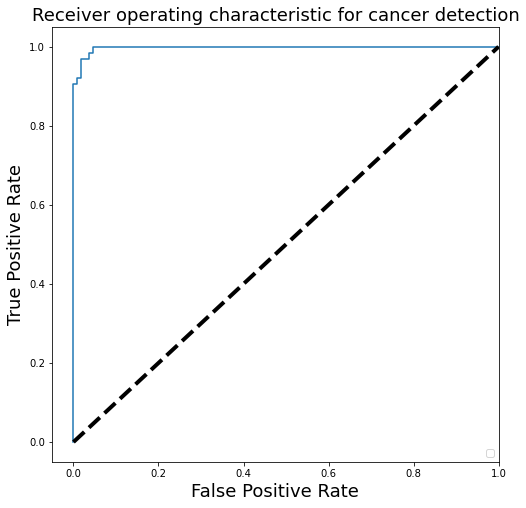

In [140]:
# For class 1, find the area under the curve
# Find fpr, tpr

fpr, tpr, thresholds = roc_curve(y_test, prob_pred_test[:,1], pos_label='M')

print([fpr, tpr, thresholds])
# Find auc
#print(roc_auc_score(y_test,prob_pred_test[:,1],labels=['M']))
#print(roc_auc_score(y_test,y_pred_test,labels=['M','B']))

print(auc(fpr,tpr))

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



